# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 4/13/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 4/13/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,980,38928341,2.5
Albania,4029,2877800,140.0
Algeria,1738,43851043,4.0
Andorra,670,77265,867.1
Angola,1515,32866268,4.6
Antigua and Barbuda,65,97928,66.4
Argentina,246235,45195777,544.8
Armenia,12562,2963234,423.9
Australia,146,25459700,0.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Uruguay,46969,3473727,1352.1
San Marino,307,33938,904.6
Bahrain,15215,1701583,894.2
Andorra,670,77265,867.1
Hungary,82345,9660350,852.4
Poland,311024,37846605,821.8
Turkey,684880,84339067,812.1
France,521251,65273512,798.6
Sweden,80061,10099270,792.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

4/9/21     2990724.0
4/10/21    3009452.0
4/11/21    3012158.0
4/12/21    3024604.0
4/13/21    3054025.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/31/21        NaN
4/1/21     22679.0
4/2/21     16033.0
4/3/21      3673.0
4/4/21     10300.0
4/5/21      5980.0
4/6/21      7593.0
4/7/21     30377.0
4/8/21     26510.0
4/9/21     23935.0
4/10/21    18728.0
4/11/21     2706.0
4/12/21    12446.0
4/13/21    29421.0
Name: Germany, dtype: float64

<AxesSubplot:>

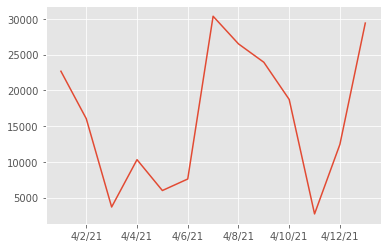

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

251.0994200619224